# **Welcome to the Notebook**

### Let's mount the google drive 

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1 : 
Installing pyspark module

In [3]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 38 kB/s 
     |████████████████████████████████| 198 kB 50.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=ad8f8df514b6c4ca40ff020c78f11efd72a57d13158759303e9eb062d7a0f12d
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


Importing the modules 

In [53]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plts

creating spark session

In [5]:
spark = SparkSession.builder.appName('saprk_app').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [39]:
listening_csv_path = '/content/drive/MyDrive/listenings.csv'
df =spark.read.csv(listening_csv_path, inferSchema=True, header=True)


let's check the data:

In [7]:
df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [8]:
df = df.drop('date')

drop the null rows:

In [9]:
df = df.na.drop()

let's check the dataset again:

In [10]:
df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema: 

In [11]:
df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [12]:
shape = (df.count(), len(df.columns))
shape

(13758905, 4)

# Task 3:

**Query #0:**
select two columns: track and artist

In [13]:
# Task 3:
df.select('track', 'artist').show()

+--------------------+---------------+
|               track|         artist|
+--------------------+---------------+
|           Price Tag|       Jessie J|
|Price Tag (Acoust...|       Jessie J|
|Be Mine! (Ballad ...|          Robyn|
|            Acapella|          Kelis|
|   I'm Not Invisible|      The Tease|
|Bounce (Feat NORE...|       MSTRKRFT|
|Don't Stop The Mu...|        Rihanna|
|               ObZen|      Meshuggah|
|   Yama's Messengers|         Gojira|
|On the Brink of E...|   Napalm Death|
|On the Brink of E...|   Napalm Death|
|        In Deference|   Napalm Death|
|      Post(?)organic|    Decapitated|
|        Mind Feeders|   Dom & Roland|
|Necrosadistic War...|Cannibal Corpse|
|     Dance All Night|   Dom & Roland|
|          Late Night|   Dom & Roland|
|          Freak Seen|   Dom & Roland|
|Paradrenasite (Hi...|   Dom & Roland|
|               Rhino|   Dom & Roland|
+--------------------+---------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [14]:
df.filter(df['artist'] == 'Rihanna').select(df['user_id'],df['artist']).count()

41594

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [15]:
df_1 = df.select('user_id').filter(df['artist'] == 'Rihanna')
df_1.show()

+-----------+
|    user_id|
+-----------+
|000Silenced|
|000Silenced|
|00williamsl|
|00williamsl|
|00williamsl|
|00williamsl|
|00williamsl|
|    0502008|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
+-----------+
only showing top 20 rows



In [16]:
df_1.groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10).show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [30]:
df_2 = df.select('artist','track')
df_2.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



In [31]:
df_2.groupby('artist','track').agg(count('*').alias('favorite_track')).orderBy(desc('favorite_track')).limit(10).show()

+--------------+----------------+--------------+
|        artist|           track|favorite_track|
+--------------+----------------+--------------+
| Justin Bieber|           Sorry|          3381|
|Arctic Monkeys|Do I Wanna Know?|          2865|
|      Bon Iver|     Skinny Love|          2836|
|          Zayn|      PILLOWTALK|          2701|
|   The Killers|   Mr Brightside|          2690|
|       Rihanna|            Work|          2646|
|      Bastille|         Pompeii|          2606|
|Mumford & Sons| Little Lion Man|          2520|
|Mumford & Sons|        The Cave|          2485|
| Justin Bieber|   Love Yourself|          2481|
+--------------+----------------+--------------+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [21]:
df_3 = df.filter((df['artist']=='Rihanna'))
df_3.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

In [32]:
df_3.groupby('artist','track').agg(count('*').alias('favorite_track')).orderBy(desc('favorite_track')).limit(10).show()

+-------+--------------------+--------------+
| artist|               track|favorite_track|
+-------+--------------------+--------------+
|Rihanna|                Work|          2646|
|Rihanna|Only Girl (In the...|          1749|
|Rihanna|We Found Love (fe...|          1575|
|Rihanna|                 S&M|          1307|
|Rihanna|            Rude Boy|          1303|
|Rihanna|            Diamonds|          1224|
|Rihanna|      Kiss it Better|           945|
|Rihanna| Where Have You Been|           844|
|Rihanna|Cheers (Drink to ...|           697|
|Rihanna|           Needed Me|           679|
+-------+--------------------+--------------+



**Query #5:**

find top 10 famous albums 

In [24]:
df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [27]:
df.groupby('artist','album').agg(count('*').alias('favorite_album')).orderBy(desc('favorite_album')).limit(10).show()

+--------------------+--------------------+--------------+
|              artist|               album|favorite_album|
+--------------------+--------------------+--------------+
|          Kanye West|   The Life Of Pablo|         22310|
|              The xx|                  xx|         14195|
|      Arctic Monkeys|                  AM|         14090|
|               alt-J|     An Awesome Wave|         13635|
|      Mumford & Sons|        Sigh No More|         13543|
|      Arctic Monkeys|Whatever People S...|         12731|
|            Bon Iver|            For Emma|         11994|
|              Grimes|          Art Angels|         11655|
|Florence + the Ma...|               Lungs|         11362|
|               Adele|                  21|         11215|
+--------------------+--------------------+--------------+



# Task 4 :
importing the ***genre.csv*** file:

In [36]:
genre_csv_path = '/content/drive/MyDrive/datasets/dataset/genre.csv'
genre_df =spark.read.csv(genre_csv_path, inferSchema=True, header=True)

let's check the data

In [37]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [43]:
join_df = df.join(genre_df, on='artist', how='inner')
join_df.show()

+------------+-----------+-------------+--------------------+--------------------+--------------------+
|      artist|    user_id|         date|               track|               album|               genre|
+------------+-----------+-------------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|1299680100000|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|1299680100000|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|1299680100000|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|1299680100000|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|1299679920000|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|1299679920000|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|1299679920000|Price Tag (Acoust...|   

**Query #6**

find top 10 users who are fan of ***pop*** music

In [47]:
join_df.select('user_id').filter(join_df.genre == 'pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10).show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|    musicboy80s|  384|
|   BlueKnockOut|  378|
|  incultojurgis|  374|
| ElektricOrchid|  371|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|        DP_Sage|  320|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [48]:
join_df.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10).show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2811365|
|       pop|1653729|
|electronic| 590315|
|   hip hop| 568489|
|      folk| 460192|
|indie rock| 450651|
|      punk| 397175|
|       r&b| 370578|
|     indie| 220224|
|     metal| 217371|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [59]:
 q8 = join_df.select('user_id','genre').groupby('user_id','genre').agg(count('*').alias('count')).orderBy('user_id')
 q8.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|               dance|    1|
| --Seph|            new rave|    1|
| --Seph| Boston Pops Orch...|    1|
| --Seph| Sir Colin Davis ...|    1|
| --Seph|          Nils Frahm|    1|
| --Seph|          Thom Yorke|    2|
| --Seph|  progressive trance|    1|
| --Seph| General MDShirin...|    2|
| --Seph|          snoop dogg|    4|
| --Seph|        thrash metal|    1|
| --Seph| The Ambrosian Si...|    1|
| --Seph|         folktronica|    2|
| --Seph|   progressive house|    1|
| --Seph|                 80s|    1|
| --Seph|           indie pop|    1|
| --Seph|         heavy metal|    1|
| --Seph|                folk|   10|
| --Seph|           anti-folk|    3|
| --Seph|     Jennifer Vyvyan|    1|
| --Seph|              Xzibit|    4|
+-------+--------------------+-----+
only showing top 20 rows



In [69]:
q8.groupby('user_id').agg(max(struct(col('count'), col('genre'))).alias('max')).show()

+---------------+-----------------+
|        user_id|              max|
+---------------+-----------------+
|      --Shinn--|      {112, rock}|
|       --ollz--|       {47, rock}|
|     -Amnesiac-|     {323, metal}|
|         -Bish-|      {107, rock}|
|        -Danni-|       {49, rock}|
|          -DeWp|    {87, hip hop}|
|      -Faction-|       {57, rock}|
|-February-Star-|       {74, rock}|
|        -Gemma-|{38, british pop}|
|   -Gingergirl-|        {28, pop}|
|        -Hazel-|   {15, synthpop}|
|        -Heiko-| {43, electronic}|
|-InsertNameHere|        {68, ska}|
|         -Katie|      {58, lo-fi}|
|      -Krystal-|       {87, rock}|
|         -Mark-| {37, indie rock}|
|       -Mullet-|  {64, metalcore}|
|          -Robs|       {38, rock}|
| -SleepingStar-|{57, black metal}|
|      -Stifler-|      {144, rock}|
+---------------+-----------------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [74]:
q9 = join_df.select('genre')\
                    .filter((col('genre') == 'pop') | (col('genre') == 'rock') | (col('genre') == 'metal')| (col('genre') == 'hip hop'))\
                    .groupby('genre').agg(count('genre').alias('count'))

q9.show()

+-------+-------+
|  genre|  count|
+-------+-------+
|    pop|1653729|
|hip hop| 568489|
|  metal| 217371|
|   rock|2811365|
+-------+-------+



Now, let's visualize the results using ***matplotlib***

In [75]:
q9.collect()

[Row(genre='pop', count=1653729),
 Row(genre='hip hop', count=568489),
 Row(genre='metal', count=217371),
 Row(genre='rock', count=2811365)]

In [76]:
q9_list = q9.collect()

In [78]:
lables = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

In [79]:
print(lables)
print(counts)


['pop', 'hip hop', 'metal', 'rock']
[1653729, 568489, 217371, 2811365]


now lets visualize these two lists using a bar chart

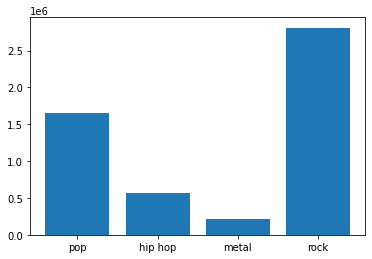

In [81]:
plts.bar(lables,counts);